
## Introduction

The Abstraction and Reasoning Corpus (ARC) AGI 2 is a benchmark designed to measure artificial general intelligence through abstract reasoning tasks. This notebook explores the ARC AGI 2 puzzle challenge, its significance, and approaches to solving these complex reasoning problems.


## What is ARC AGI?

ARC (Abstraction and Reasoning Corpus) was introduced by François Chollet in 2019 as a benchmark for measuring machine intelligence. Unlike traditional AI benchmarks that focus on pattern recognition in large datasets, ARC tests the ability to:

- **Abstract reasoning**: Understanding underlying rules from minimal examples
- **Generalization**: Applying learned patterns to novel situations
- **Few-shot learning**: Learning from very few examples (typically 2-4)
- **Visual pattern recognition**: Working with grid-based visual puzzles

### Key Characteristics:
- **Grid-based puzzles**: Each task involves colored grids (usually 3x3 to 30x30)
- **Minimal examples**: Only 2-4 input-output pairs provided for training
- **Rule inference**: Must infer the underlying transformation rule
- **Single test case**: Apply the rule to generate the correct output


## ARC AGI 2 Challenge

The ARC AGI 2 challenge builds upon the original ARC benchmark with:

### Enhanced Complexity
- More sophisticated reasoning patterns
- Increased puzzle difficulty
- Novel transformation types
- Multi-step reasoning requirements

### Competition Format
- **Prize Pool**: Significant monetary incentives (often $1M+)
- **Evaluation**: Systems must solve puzzles they've never seen before
- **Success Metric**: Percentage of correctly solved test puzzles
- **Time Constraints**: Limited computational resources and time


In [1]:
# Let's create a simple visualization framework for ARC puzzles
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.patches import Rectangle

# ARC color palette (10 colors: black, blue, red, green, yellow, gray, magenta, orange, sky, brown)
ARC_COLORS = [
    '#000000',  # 0: black
    '#0074D9',  # 1: blue  
    '#FF4136',  # 2: red
    '#2ECC40',  # 3: green
    '#FFDC00',  # 4: yellow
    '#AAAAAA',  # 5: gray
    '#F012BE',  # 6: magenta
    '#FF851B',  # 7: orange
    '#7FDBFF',  # 8: sky
    '#870C25'   # 9: brown
]

def visualize_grid(grid, title="Grid", figsize=(4, 4)):
    """
    Visualize an ARC grid with proper colors
    """
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # Create custom colormap
    cmap = colors.ListedColormap(ARC_COLORS)
    
    # Display the grid
    ax.imshow(grid, cmap=cmap, vmin=0, vmax=9)
    
    # Add grid lines
    for i in range(grid.shape[0] + 1):
        ax.axhline(y=i-0.5, color='white', linewidth=1)
    for i in range(grid.shape[1] + 1):
        ax.axvline(x=i-0.5, color='white', linewidth=1)
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax

def visualize_task(input_grids, output_grids, test_input, title="ARC Task"):
    """
    Visualize a complete ARC task with training examples and test input
    """
    n_examples = len(input_grids)
    
    fig, axes = plt.subplots(2, n_examples + 1, figsize=(3 * (n_examples + 1), 6))
    if n_examples == 0:
        axes = axes.reshape(2, 1)
    
    # Create custom colormap
    cmap = colors.ListedColormap(ARC_COLORS)
    
    # Plot training examples
    for i in range(n_examples):
        # Input
        axes[0, i].imshow(input_grids[i], cmap=cmap, vmin=0, vmax=9)
        axes[0, i].set_title(f'Input {i+1}', fontweight='bold')
        axes[0, i].set_xticks([])
        axes[0, i].set_yticks([])
        
        # Output
        axes[1, i].imshow(output_grids[i], cmap=cmap, vmin=0, vmax=9)
        axes[1, i].set_title(f'Output {i+1}', fontweight='bold')
        axes[1, i].set_xticks([])
        axes[1, i].set_yticks([])
    
    # Plot test input
    axes[0, n_examples].imshow(test_input, cmap=cmap, vmin=0, vmax=9)
    axes[0, n_examples].set_title('Test Input', fontweight='bold')
    axes[0, n_examples].set_xticks([])
    axes[0, n_examples].set_yticks([])
    
    # Empty space for test output
    axes[1, n_examples].text(0.5, 0.5, '?', ha='center', va='center', 
                            fontsize=50, transform=axes[1, n_examples].transAxes)
    axes[1, n_examples].set_title('Test Output', fontweight='bold')
    axes[1, n_examples].set_xticks([])
    axes[1, n_examples].set_yticks([])
    
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    return fig, axes

print("ARC visualization functions loaded successfully!")


ARC visualization functions loaded successfully!


## Example ARC AGI Puzzle Types

Let's explore some common patterns found in ARC AGI puzzles:


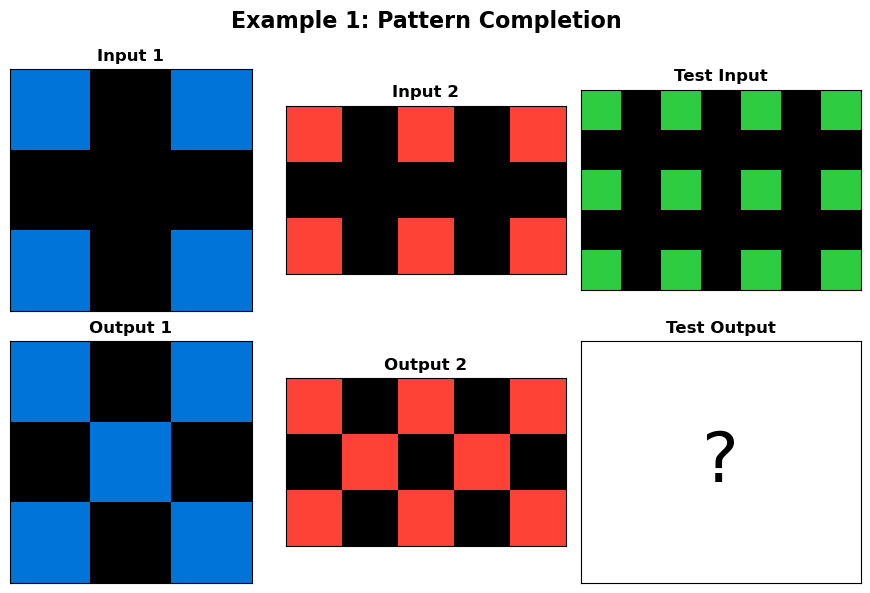

Pattern Analysis:
- Rule: Fill empty rows with alternating pattern
- The middle row gets filled with the opposite pattern
- Colors are preserved from the border pattern


In [2]:
# Example 1: Simple Pattern Completion
# Rule: Fill in missing squares to complete a pattern

# Training examples
input1 = np.array([
    [1, 0, 1],
    [0, 0, 0],
    [1, 0, 1]
])

output1 = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
])

input2 = np.array([
    [2, 0, 2, 0, 2],
    [0, 0, 0, 0, 0],
    [2, 0, 2, 0, 2]
])

output2 = np.array([
    [2, 0, 2, 0, 2],
    [0, 2, 0, 2, 0],
    [2, 0, 2, 0, 2]
])

# Test case
test_input = np.array([
    [3, 0, 3, 0, 3, 0, 3],
    [0, 0, 0, 0, 0, 0, 0],
    [3, 0, 3, 0, 3, 0, 3],
    [0, 0, 0, 0, 0, 0, 0],
    [3, 0, 3, 0, 3, 0, 3]
])

# Visualize the task
fig, axes = visualize_task([input1, input2], [output1, output2], test_input, 
                          "Example 1: Pattern Completion")

plt.show()

print("Pattern Analysis:")
print("- Rule: Fill empty rows with alternating pattern")
print("- The middle row gets filled with the opposite pattern")
print("- Colors are preserved from the border pattern")


## Common ARC AGI Puzzle Categories

### 1. **Geometric Transformations**
- Rotation, reflection, scaling
- Translation and positioning
- Shape completion and continuation

### 2. **Pattern Recognition**
- Repetition and tiling
- Alternating patterns
- Sequence continuation

### 3. **Logical Operations**
- Boolean operations (AND, OR, XOR)
- Conditional transformations
- Rule-based modifications

### 4. **Spatial Reasoning**
- Object counting and sorting
- Relative positioning
- Boundary detection

### 5. **Color and Attribute Mapping**
- Color substitution rules
- Attribute-based transformations
- Multi-step color changes


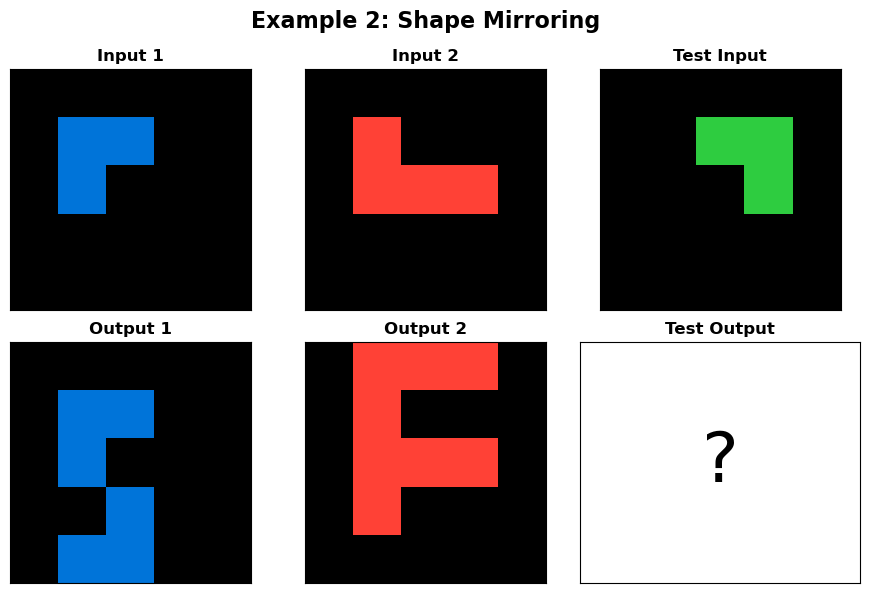

Pattern Analysis:
- Rule: Mirror the shape vertically (flip across horizontal axis)
- The original shape is preserved
- The mirrored copy appears below the original


In [3]:
# Example 2: Shape Transformation
# Rule: Mirror shapes across different axes

input1 = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
])

output1 = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0]
])

input2 = np.array([
    [0, 0, 0, 0, 0],
    [0, 2, 0, 0, 0],
    [0, 2, 2, 2, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
])

output2 = np.array([
    [0, 2, 2, 2, 0],
    [0, 2, 0, 0, 0],
    [0, 2, 2, 2, 0],
    [0, 2, 0, 0, 0],
    [0, 0, 0, 0, 0]
])

test_input = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 3, 3, 0],
    [0, 0, 0, 3, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
])

fig, axes = visualize_task([input1, input2], [output1, output2], test_input, 
                          "Example 2: Shape Mirroring")

plt.show()

print("Pattern Analysis:")
print("- Rule: Mirror the shape vertically (flip across horizontal axis)")
print("- The original shape is preserved")
print("- The mirrored copy appears below the original")


## Approaches to Solving ARC AGI 2

### 1. **Program Synthesis**
- Generate programs that can transform input to output
- Use domain-specific languages (DSLs)
- Search through program space

### 2. **Neural Approaches**
- Vision Transformers for grid understanding
- Graph Neural Networks for spatial relationships
- Meta-learning for few-shot adaptation

### 3. **Symbolic Reasoning**
- Logic-based rule inference
- Constraint satisfaction
- Abstract syntax trees

### 4. **Hybrid Methods**
- Combine neural perception with symbolic reasoning
- Use LLMs for pattern description and code generation
- Multi-modal approaches


In [4]:
# Simple rule-based solver framework
class ARCSolver:
    def __init__(self):
        self.rules = []
    
    def add_rule(self, rule_func, description):
        """Add a transformation rule to the solver"""
        self.rules.append({
            'function': rule_func,
            'description': description
        })
    
    def test_rule(self, rule_func, inputs, outputs):
        """Test if a rule works on all training examples"""
        for inp, out in zip(inputs, outputs):
            try:
                predicted = rule_func(inp)
                if not np.array_equal(predicted, out):
                    return False
            except:
                return False
        return True
    
    def solve(self, inputs, outputs, test_input):
        """Try to solve the puzzle using available rules"""
        for rule in self.rules:
            if self.test_rule(rule['function'], inputs, outputs):
                try:
                    result = rule['function'](test_input)
                    return result, rule['description']
                except:
                    continue
        return None, "No matching rule found"

# Example transformation rules
def mirror_vertical(grid):
    """Mirror the grid vertically"""
    non_zero_mask = grid != 0
    if np.any(non_zero_mask):
        mirrored = np.flipud(grid)
        result = np.maximum(grid, mirrored)
        return result
    return grid

def fill_center_with_count(grid):
    """Count non-zero elements and place count at center"""
    result = grid.copy()
    # Change 1s to 2s
    result[result == 1] = 2
    
    # Count original 1s
    count = np.sum(grid == 1)
    
    # Place count at center
    h, w = grid.shape
    center_y, center_x = h // 2, w // 2
    result[center_y, center_x] = count
    
    return result

# Create solver and add rules
solver = ARCSolver()
solver.add_rule(mirror_vertical, "Mirror vertically")
solver.add_rule(fill_center_with_count, "Count objects and fill center")

print("ARC Solver framework created with basic rules!")
print(f"Available rules: {len(solver.rules)}")
for i, rule in enumerate(solver.rules):
    print(f"  {i+1}. {rule['description']}")


ARC Solver framework created with basic rules!
Available rules: 2
  1. Mirror vertically
  2. Count objects and fill center


## Challenges in ARC AGI 2

### Technical Challenges
1. **Rule Complexity**: Some transformations require multi-step reasoning
2. **Generalization**: Must work on unseen test cases
3. **Minimal Training Data**: Only 2-4 examples per task
4. **Computational Constraints**: Limited time and resources

### Cognitive Challenges
1. **Abstract Thinking**: Understanding high-level concepts from pixels
2. **Pattern Recognition**: Identifying subtle visual patterns
3. **Causal Reasoning**: Understanding cause-effect relationships
4. **Compositionality**: Combining multiple simple rules

### Current AI Limitations
- **Brittleness**: Small changes can break learned patterns
- **Overfitting**: May memorize rather than understand
- **Lack of Common Sense**: Missing intuitive reasoning
- **Symbolic Grounding**: Difficulty connecting symbols to meaning


## State of the Art (2024-2025)

### Best Performing Systems
1. **MindsAI/ARC-AGI Solutions**: Hybrid symbolic-neural approaches
2. **Program Synthesis Methods**: DSL-based transformation discovery
3. **Large Language Models**: GPT-4, Claude for pattern description
4. **Specialized Neural Architectures**: Custom CNN/Transformer designs

### Current Success Rates
- **Human Performance**: ~85% on ARC tasks
- **Best AI Systems**: ~30-40% on public evaluation set
- **ARC AGI 2**: Even more challenging, lower success rates expected

### Key Insights
- Pure neural approaches struggle with novel patterns
- Symbolic reasoning shows promise but lacks robustness
- Hybrid methods currently most successful
- Human-AI collaboration outperforms pure AI


## Conclusion

ARC AGI 2 represents one of the most challenging benchmarks in artificial intelligence, testing fundamental aspects of intelligence that current systems struggle with. The puzzles require not just pattern recognition, but true understanding and generalization - hallmarks of human intelligence.

### Key Takeaways:
1. **ARC tests core AI capabilities**: abstraction, reasoning, and generalization
2. **Current AI systems are limited**: even state-of-the-art models achieve <50% success
3. **Hybrid approaches show promise**: combining neural and symbolic methods
4. **The challenge remains open**: significant advances needed for human-level performance

### Next Steps for Researchers:
- Develop better inductive biases for visual reasoning
- Create more efficient program synthesis methods
- Explore neurosymbolic architectures
- Study human problem-solving strategies

The journey toward solving ARC AGI 2 is not just about winning a competition - it's about understanding and replicating the fundamental mechanisms of intelligence itself.
